# Video Games Recommendation System

This project mainly focus on developing a video game recommendation system. Once a person entered key words such as "horror", "puzzle", "multiplayers", the system will recommend 10 video games that matches the features. Besides the video games, a sentiment score related with user's comments would also show up to provide more users' information about the video games.

In [1]:
#packages needed

import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

import warnings
warnings.simplefilter(action='ignore')

!{sys.executable} -m pip install -U textblob


%run ./Text_Normalization_Function.ipynb 

Requirement already up-to-date: textblob in /Users/anyidu/opt/anaconda3/lib/python3.7/site-packages (0.15.3)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anyidu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anyidu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anyidu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/anyidu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [2]:
df_info = pd.read_csv('metacritic_game_info.csv')
df_info = df_info.rename(columns={"Unnamed: 0": "Number"})
df_info = df_info.set_index("Number")
df_comment = pd.read_csv('metacritic_game_user_comments.csv')
df_comment = df_comment.rename(columns={"Unnamed: 0": "Number"})
df_comment = df_comment.set_index("Number")

In [3]:
#exclude non-string comments
for index, row in df_comment.iterrows():
        l=row['Comment']
        if type(l) is not str:
            df_comment.drop(index, axis=0, inplace=True)

## Lexicon-Based Sentiment Analysis (VADER Lexicon)

Import the sentiment analysis function SentimentIntensityAnalyzer() that uses the VADER lexicon from the NLTK package. Through VADER lexicon, we would be able to have a binary sentiment polarity for each of the games comment. 

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [106]:
# Binary Actual Userscore Polarity
bin_Actual = []
for i in df_comment['Userscore']:
    if i > 7.6:
        Pol = "positive"
    else:
        Pol = "negative"
    bin_Actual.append(Pol)

df_comment["Bin Actual Userscore Polarity"]=bin_Actual
df_comment.reset_index()

,Number,Title,Platform,Userscore,Comment,Username,Bin Actual Userscore Polarity
0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus,positive
1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin,positive
2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody,positive
3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman,positive
4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA,positive
...,...,...,...,...,...,...,...
283955,283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell,negative
283956,283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR,negative
283957,283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon,positive
283958,283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4,positive


In [107]:
#VADER
Vader_scores=[]
for comment in df_comment['Comment']:
    compound_score = analyzer.polarity_scores(comment)['compound']
    Vader_scores.append(compound_score)
    

df_comment['Vader Score'] = Vader_scores
df_comment.head()

,Title,Platform,Userscore,Comment,Username,Bin Actual Userscore Polarity,Vader Score
Number,,,,,,,
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus,positive,0.3758
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin,positive,0.6747
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody,positive,0.9641
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman,positive,0.9946
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA,positive,0.9622


In [108]:
# given the vader score, get polarity
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [109]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(comment, threshold=0.2) for comment in df_comment["Comment"]]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])

In [110]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(df_comment["Bin Actual Userscore Polarity"], 
                                 VADER_polarity_test_df["VADER Polarity"]), 3),"\n")

Accuracy Rate: 0.743 



## Find-tune the best threshold parameter

The next step is to select the best threshold. The main goal for this approach is to assign the polarity for each of the game comment under the highest accuracy rate. 

In [111]:
def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(df_comment["Bin Actual Userscore Polarity"], VADER_binary_polarity)
    return(accuracy) 


In [113]:
from sklearn import metrics
threshold = 0.2
print(try_threshold_for_accuracy(VADER_polarity_test_df["VADER Score"],threshold))

0.742558811100155


In [118]:
pd.crosstab(pd.Series(df_comment["Bin Actual Userscore Polarity"]), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,33869,53811,87680
positive,38841,157416,196257
All,72710,211227,283937


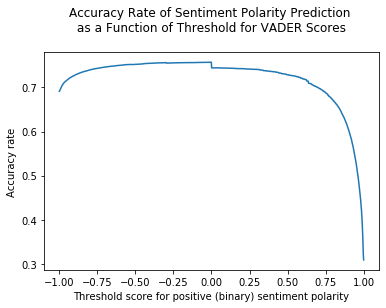

In [115]:
import matplotlib.pyplot as plt
thresholds = np.linspace(-1,1,1000)
accuracy_rates = [try_threshold_for_accuracy(VADER_polarity_test_df["VADER Score"],threshold) for threshold in thresholds]

plt.plot(thresholds, accuracy_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()


In [116]:
best_thresholds = thresholds[accuracy_rates.index(max(accuracy_rates))] 

In [119]:
best_thresholds

-0.005005005005005003

We'll be looking for the threshold value that gives us the highest accuracy rate. As you can saw in the last cell, the best_thresholds is around -0.005.

In [120]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(comment, threshold= best_thresholds) for comment in df_comment["Comment"]]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
df_comment["VADER Polarity"] = VADER_polarity_test_df['VADER Polarity']

In [121]:
df_comment.head()

,Title,Platform,Userscore,Comment,Username,Bin Actual Userscore Polarity,Vader Score,VADER Polarity
Number,,,,,,,,
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus,positive,0.3758,positive
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin,positive,0.6747,positive
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody,positive,0.9641,positive
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman,positive,0.9946,positive
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA,positive,0.9622,positive


In [125]:
df_comment["VADER Polarity"]=df_comment["VADER Polarity"].apply(lambda x: 1 if x is "positive" else 0)

## Concatenate comments for each video game

This step is to concatenate each video games comments together. By doing that, we would be able to extract the main features/or themes for each of the games.

In [126]:
df_comment_group_1=df_comment.groupby(['Title'])['Userscore','VADER Polarity','Comment'].agg({'Userscore':np.mean,\
                                                                                           'VADER Polarity':np.mean,\
                                                                           'Comment':lambda column: " ".join(column)})

In [128]:
df_comment_group=df_comment_group_1.reset_index()

In [129]:
df_comment_group.head()

,Title,Userscore,VADER Polarity,Comment
0,'Splosion Man,8.6875,0.875,One of the best purchases I've ever made on X...
1,007: The World is Not Enough,7.2000,0.600,It's quite a good fps. But for some unknown r...
2,2010 FIFA World Cup South Africa,7.6875,1.000,This game feels like an other unfinished EA s...
3,3D After Burner II,8.0000,1.000,This is the definitive port of After Burner. S...
4,3D Gunstar Heroes,8.7500,1.000,"It's Gunstar Heroes, emulated and enhanced by ..."


## Text Vectorization with Term Frequency - TF-IDF 

Now, the next step is feature extraction/vectorization using the TF-IDF approach.

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer_TF_IDF = TfidfVectorizer(norm = None, smooth_idf = True,max_features=1000)

In [132]:
NROM_comment = normalize_corpus(df_comment_group['Comment'])

In [133]:
TF_IDF_matrix = vectorizer_TF_IDF.fit_transform(NROM_comment).toarray()

In [134]:
TF_IDF_matrix_names = vectorizer_TF_IDF.get_feature_names() 

In [135]:
TF_IDF_matrix_table = pd.DataFrame(np.round(TF_IDF_matrix, 2), columns = TF_IDF_matrix_names)
TF_IDF_matrix_table.head()

,2d,3d,3ds,ability,able,absolute,absolutely,account,achievement,across,...,write,writing,wrong,xbox,yeah,year,yes,yet,zelda,zombie
0,0.0,0.00,0.00,0.0,3.14,0.0,0.00,0.0,0.0,0.0,...,1.82,0.0,0.00,0.0,2.07,0.00,3.34,1.43,0.0,0.0
1,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,1.67,0.0,0.00,0.00,0.00,0.00,0.0,0.0
2,0.0,0.00,0.00,0.0,1.57,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,1.32,0.00,0.00,0.0,0.0
3,0.0,10.59,10.24,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.00,3.34,0.00,0.0,0.0
4,0.0,10.59,3.41,0.0,3.14,0.0,3.12,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.00,0.00,3.34,0.00,0.0,0.0


## Topic Modeling - Latent Semantic Analysis (LSA)

In the topic modeling section, we decided to perform a LSA instead of LDA. Because the result of LDA does not perform as well as LSA. LSA learns latent topics by performing a matrix decomposition on the document-term matrix using singular value decomposition. Through LSA, we would be able to select the main 35 features/genres from video games and for each of the main feature, we select the 40 keywords.

In [136]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [137]:
# Method 1
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [138]:
n_comp = 35
no_top_words = 40

lsa = TruncatedSVD(n_components=n_comp)

lsa_tfidf_data = lsa.fit_transform(TF_IDF_matrix)

In [139]:
display_topics(lsa,TF_IDF_matrix_names,no_top_words)


Topic  0
game, diretide, play, like, story, give, good, time, character, diablo, great, really, new, even, valve, well, much, people, player, bad, feel, best, graphic, world, first, fun, thing, fallout, blizzard, multiplayer, end, review, mw2, hour, gameplay, cod, combat, look, skyrim, take

Topic  1
diretide, valve, give, hero, community, hat, update, event, thanks, match, learn, team, na, free, rts, normal, beta, win, set, boy, garbage, result, football, balance, complex, 3ds, 2d, strategy, kart, pokemon, racing, addict, happy, remake, ps2, dull, hook, master, madden, solo

Topic  2
mw2, mw3, cod, ops, warfare, multiplayer, duty, campaign, map, battlefield, modern, call, black, new, gun, halo, zombie, mode, fps, survival, shooter, player, perk, spawn, kill, engine, weapon, series, pack, year, single, franchise, buy, change, shoot, people, copy, multi, team, like

Topic  3
diablo, blizzard, server, mw2, mw3, cod, ops, house, player, online, play, skill, warfare, loot, item, multiplay

Display topics for LDA on TF-IDF Vectorizer (as comparison)

In [ ]:
lda = LatentDirichletAllocation(n_components=n_comp)

lda_cv_data = lda.fit_transform(cv_data)
lda_tfidf_data = lda.fit_transform(tfidf_data)

display_topics(lda,tfidf_vectorizer.get_feature_names(),15)

# Recommendation System - K-nearest neighbors (KNN)

After topic modeling, we are able to select 35 main features and 40 keywords for each of the feature. Then, the last step is to create a recommendation system through KNN approaches. We set the k value as 10 so that we would be able to find the cloest 10 video games as a return value. The input is the features that you are searching and the output would be 10 related video games with sentiment review score as a supplemental information.

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold

In [143]:
X=lsa_tfidf_data
y=df_comment_group['Title']

In [156]:
def get_recommendations(first_article, model, vectorizer, X,y):
    new_vec = model.transform(vectorizer.transform([first_article]))
    nn = KNeighborsClassifier(n_neighbors=10, metric='cosine', algorithm='brute').fit(X,y)
    results = nn.kneighbors(new_vec)
    return results[1][0]

In [160]:
result = get_recommendations("warfare, multiplayer, duty, campaign", lsa, vectorizer_TF_IDF, X,y)
result

array([216, 215, 214, 213, 221, 219,  89, 218, 217, 211])

In [161]:
for r in result:
    game = df_comment_group.Title[r]
    vader_polarity = df_comment_group["VADER Polarity"][r]
    print(f'Recommend games name is {game}. \nThe sentiment score of is {round(vader_polarity,2)}.')

Recommend games name is Call of Duty: Black Ops III. 
The sentiment score of is 0.66.
Recommend games name is Call of Duty: Black Ops II. 
The sentiment score of is 0.64.
Recommend games name is Call of Duty: Black Ops. 
The sentiment score of is 0.62.
Recommend games name is Call of Duty: Advanced Warfare. 
The sentiment score of is 0.7.
Recommend games name is Call of Duty: World at War. 
The sentiment score of is 0.65.
Recommend games name is Call of Duty: Modern Warfare Remastered. 
The sentiment score of is 0.67.
Recommend games name is B-17 Flying Fortress: The Mighty 8th. 
The sentiment score of is 1.0.
Recommend games name is Call of Duty: Modern Warfare 3. 
The sentiment score of is 0.62.
Recommend games name is Call of Duty: Modern Warfare 2. 
The sentiment score of is 0.64.
Recommend games name is Call of Duty 3. 
The sentiment score of is 0.68.


In [162]:
result2 = get_recommendations("humor, short, funny", lsa, vectorizer_TF_IDF, X,y)
result2

array([1429, 1428, 2307, 1427, 1985, 2004, 1478, 1603, 1781, 1704])

In [163]:
for r in result2:
    game = df_comment_group.Title[r]
    vader_polarity = df_comment_group["VADER Polarity"][r]
    print(f'Recommend games name is {game}. \nThe sentiment score of is {round(vader_polarity,2)}.')

Recommend games name is Portal: Still Alive. 
The sentiment score of is 0.97.
Recommend games name is Portal 2. 
The sentiment score of is 0.94.
Recommend games name is ZEN Pinball 2: Portal Pinball. 
The sentiment score of is 1.0.
Recommend games name is Portal. 
The sentiment score of is 0.94.
Recommend games name is The Orange Box. 
The sentiment score of is 0.95.
Recommend games name is The Talos Principle. 
The sentiment score of is 0.88.
Recommend games name is Quell Memento. 
The sentiment score of is 1.0.
Recommend games name is Sam & Max Episode 105: Reality 2.0. 
The sentiment score of is 1.0.
Recommend games name is Statik. 
The sentiment score of is 1.0.
Recommend games name is Snipperclips Plus: Cut It Out, Together!. 
The sentiment score of is 1.0.
